In [52]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [53]:
data = fetch_california_housing()

In [61]:
housing = pd.DataFrame(data.data, columns=data.feature_names)
housing['Target'] = data.target

In [63]:
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# По двум признакам

In [64]:
df = housing.head()
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [105]:
features = ['HouseAge', 'Population']
X = df[features]
y = df['Target']

In [66]:
X

,HouseAge,Population
0,41.0,322.0
1,21.0,2401.0
2,52.0,496.0
3,52.0,558.0
4,52.0,565.0


In [67]:
y

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Target, dtype: float64

## Дерево решений

In [58]:
tree = DecisionTreeRegressor(random_state=2)
tree

DecisionTreeRegressor(random_state=2)

In [59]:
tree.fit(X, y)

DecisionTreeRegressor(random_state=2)

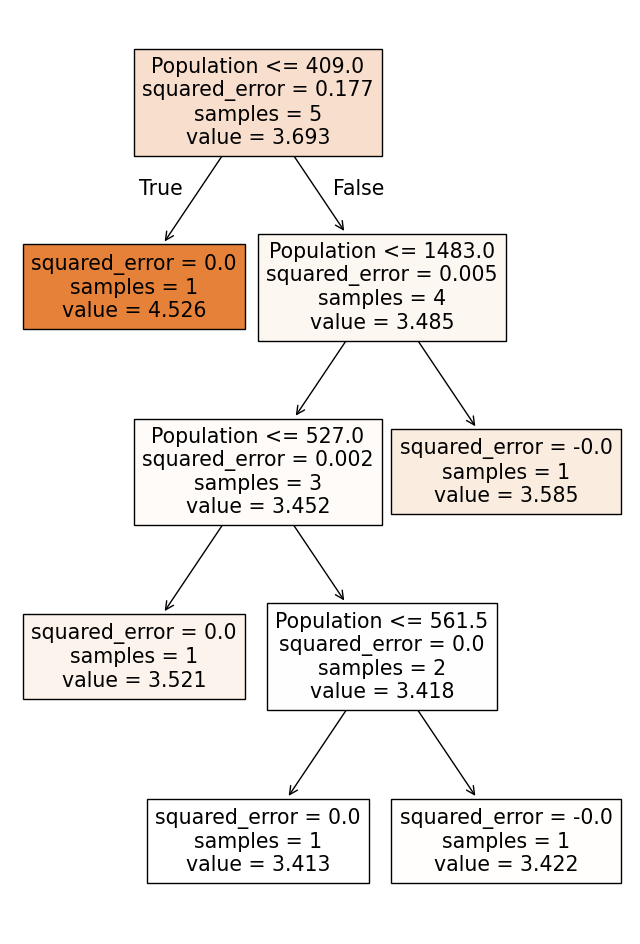

In [60]:
plt.figure(figsize=(8, 12))
plot_tree(tree, feature_names=features, filled=True);

In [68]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [92]:
df['Population'].sort_values().unique()

array([ 322.,  496.,  558.,  565., 2401.])

In [106]:
from sklearn.tree import export_text

tree_rules = export_text(tree, feature_names=features)
print(tree_rules)

|--- Population <= 409.00
|   |--- value: [4.53]
|--- Population >  409.00
|   |--- Population <= 1483.00
|   |   |--- Population <= 527.00
|   |   |   |--- value: [3.52]
|   |   |--- Population >  527.00
|   |   |   |--- Population <= 561.50
|   |   |   |   |--- value: [3.41]
|   |   |   |--- Population >  561.50
|   |   |   |   |--- value: [3.42]
|   |--- Population >  1483.00
|   |   |--- value: [3.58]



In [104]:
features = tree.tree_.feature 
tree.tree_.threshold[features!=-2]

array([ 409. , 1483. ,  527. ,  561.5])